In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import warnings                    ## Filter warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/content/earthquake_1995-2023.csv')
data.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

In [4]:
data.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.940150,3.605000,6.02700,0.325000,847.915000,193.918000,1.125174,20.926290,74.612541,4.315554,51.486576
std,0.438148,3.328972,1.43399,0.468609,301.802632,239.045858,2.073164,24.415895,130.812590,26.633320,117.478302
min,6.500000,0.000000,1.00000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.00000,0.000000,691.000000,0.000000,0.000000,0.000000,16.000000,-13.518500,-71.694450
50%,6.800000,4.000000,6.00000,0.000000,744.000000,0.000000,0.000000,18.000000,29.000000,-2.443500,107.791000
75%,7.100000,7.000000,7.00000,1.000000,874.250000,403.000000,1.549250,27.000000,55.000000,25.167250,148.364750
max,9.100000,9.000000,10.00000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


In [9]:
data.tail()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
995,"M 7.1 - 85 km S of Tungor, Russia",7.1,27-05-1995 13:03,0,9,NaN,0,776,us,0,0.0,0.0,mwb,11.0,52.629,142.827,"Tungor, Russia",Asia,Russia
996,"M 7.7 - 249 km E of Vao, New Caledonia",7.7,16-05-1995 20:12,0,4,NaN,0,912,us,0,0.0,0.0,mw,20.2,-23.008,169.900,"Vao, New Caledonia",NaN,NaN
997,"M 6.9 - 27 km NNW of Maubara, Timor Leste",6.9,14-05-1995 11:33,0,6,NaN,0,732,us,0,0.0,0.0,mw,11.2,-8.378,125.127,"Maubara, Timor Leste",NaN,Indonesia
998,"M 6.6 - 10 km W of Aianí, Greece",6.6,13-05-1995 08:47,0,9,NaN,0,670,us,0,0.0,0.0,mw,14.0,40.149,21.695,"Aianí, Greece",Europe,Greece
999,"M 7.1 - 14 km NE of Cabatuan, Philippines",7.1,05-05-1995 03:53,0,7,NaN,0,776,us,0,0.0,0.0,mw,16.0,12.626,125.297,"Cabatuan, Philippines",NaN,Philippines


In [5]:
data.isnull().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        551
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       6
continent    716
country      349
dtype: int64

In [6]:
data_dropped=data.dropna()

In [7]:
print(data_dropped.isnull().sum())

title        0
magnitude    0
date_time    0
cdi          0
mmi          0
alert        0
tsunami      0
sig          0
net          0
nst          0
dmin         0
gap          0
magType      0
depth        0
latitude     0
longitude    0
location     0
continent    0
country      0
dtype: int64


In [10]:
pd.set_option('display.max_row',25)

In [13]:
pd.set_option('display.max_column',25)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

In [15]:
data.size

19000

In [16]:
data.columns

Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country'],
      dtype='object')

In [17]:
data.value_counts

<bound method DataFrame.value_counts of                                                  title  magnitude  \
0                     M 6.5 - 42 km W of Sola, Vanuatu        6.5   
1             M 6.5 - 43 km S of Intipucá, El Salvador        6.5   
2             M 6.6 - 25 km ESE of Loncopué, Argentina        6.6   
3                M 7.2 - 98 km S of Sand Point, Alaska        7.2   
4                             M 7.3 - Alaska Peninsula        7.3   
5    M 6.6 - 277 km NNE of Codrington, Antigua and ...        6.6   
6                                        M 6.9 - Tonga        6.9   
7                    M 7.2 - south of the Fiji Islands        7.2   
8                M 6.6 - Panama-Colombia border region        6.6   
9             M 7.1 - southeast of the Loyalty Islands        7.1   
10            M 7.7 - southeast of the Loyalty Islands        7.7   
11                  M 7.6 - 95 km WNW of Hihifo, Tonga        7.6   
..                                                 ...        .

In [27]:
x=data.shape[0]
print(f'Number of records (rows) in the dataset are: {x}')

y=data.shape[1]
print(f'The number of records(columns) in the dataset are: {y}')

z=data.duplicated().sum()
print(f'The Number of duplicate entries in the dataset are: {z}')

s=data.isna().sum()
print(f'The Number missing values in the dataset are: {sum(s)}')

Number of records (rows) in the dataset are: 1000
The number of records(columns) in the dataset are: 19
The Number of duplicate entries in the dataset are: 0
The Number missing values in the dataset are: 1622


In [29]:
data.isnull().sum()[data.isnull().sum() > 0]

alert        551
location       6
continent    716
country      349
dtype: int64

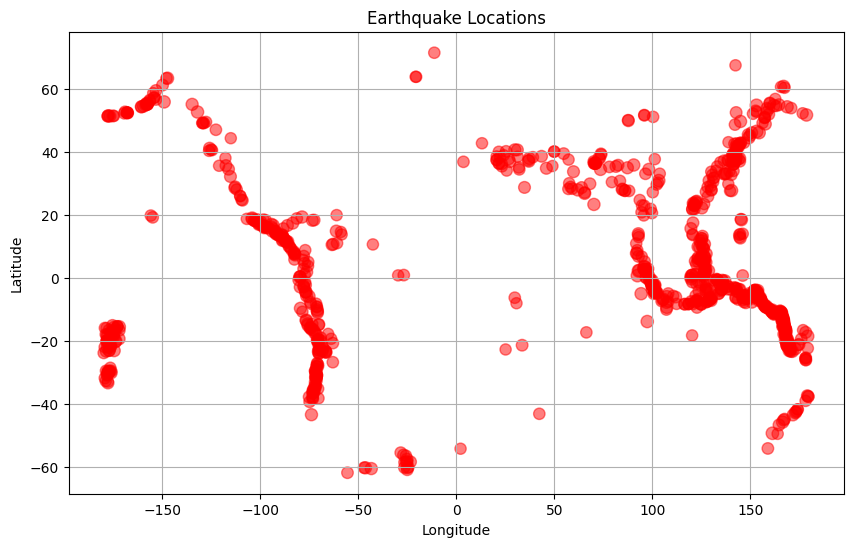

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(data['longitude'],data['latitude'],s=data['magnitude']*10,alpha=0.5,c='red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earthquake Locations')
plt.grid(True)
plt.show()

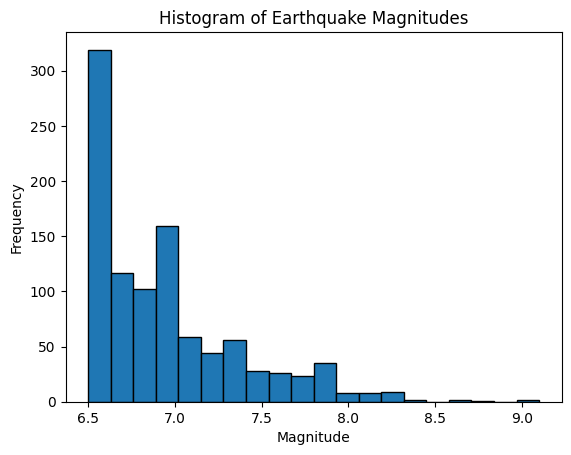

In [32]:
plt.hist(data['magnitude'],bins=20,edgecolor='black')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Histogram of Earthquake Magnitudes')
plt.show()

In [34]:
data['date_time']=pd.to_datetime(data['date_time'])

In [35]:
data['date_time']

0     2023-08-16 12:47:00
1     2023-07-19 00:22:00
2     2023-07-17 03:05:00
3     2023-07-16 06:48:00
4     2023-07-16 06:48:00
5     2023-10-07 20:28:00
6     2023-02-07 10:27:00
7     2023-06-15 18:06:00
8     2023-05-25 03:05:00
9     2023-05-20 01:51:00
10    2023-05-19 02:57:00
11    2023-10-05 16:02:00
              ...        
988   1995-08-16 16:24:00
989   1995-08-16 10:27:00
990   1995-08-14 04:37:00
991   1995-07-30 05:11:00
992   1995-11-07 21:46:00
993   1995-06-29 12:24:00
994   1995-06-15 00:15:00
995   1995-05-27 13:03:00
996   1995-05-16 20:12:00
997   1995-05-14 11:33:00
998   1995-05-13 08:47:00
999   1995-05-05 03:53:00
Name: date_time, Length: 1000, dtype: datetime64[ns]

In [105]:
date_counts=data.resample('d',on='date_time').size()
date_counts

date_time
1995-01-11    1
1995-01-12    0
1995-01-13    0
1995-01-14    0
1995-01-15    0
1995-01-16    0
1995-01-17    0
1995-01-18    0
1995-01-19    0
1995-01-20    0
1995-01-21    0
1995-01-22    0
             ..
2023-09-26    0
2023-09-27    0
2023-09-28    0
2023-09-29    0
2023-09-30    0
2023-10-01    0
2023-10-02    0
2023-10-03    0
2023-10-04    0
2023-10-05    1
2023-10-06    0
2023-10-07    1
Freq: D, Length: 10497, dtype: int64

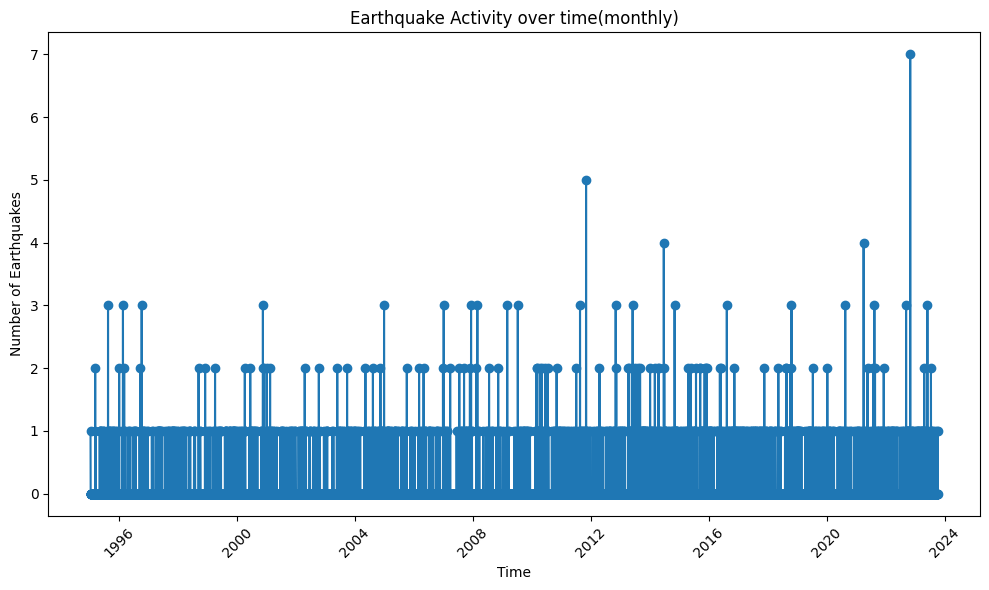

In [107]:
plt.figure(figsize=(10,6))
plt.plot(date_counts.index,date_counts.values,marker='o')
plt.xlabel('Time')
plt.ylabel('Number of Earthquakes')
plt.title('Earthquake Activity over time(monthly)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
monthly_counts=data.resample('M',on='date_time').size()

In [40]:
monthly_counts

date_time
1995-01-31     1
1995-02-28     0
1995-03-31     3
1995-04-30     0
1995-05-31     5
1995-06-30     3
1995-07-31     1
1995-08-31     6
1995-09-30     3
1995-10-31     3
1995-11-30     2
1995-12-31     2
              ..
2022-11-30    10
2022-12-31     1
2023-01-31     3
2023-02-28     4
2023-03-31     5
2023-04-30     6
2023-05-31     3
2023-06-30     4
2023-07-31     4
2023-08-31     2
2023-09-30     1
2023-10-31     2
Freq: M, Length: 346, dtype: int64

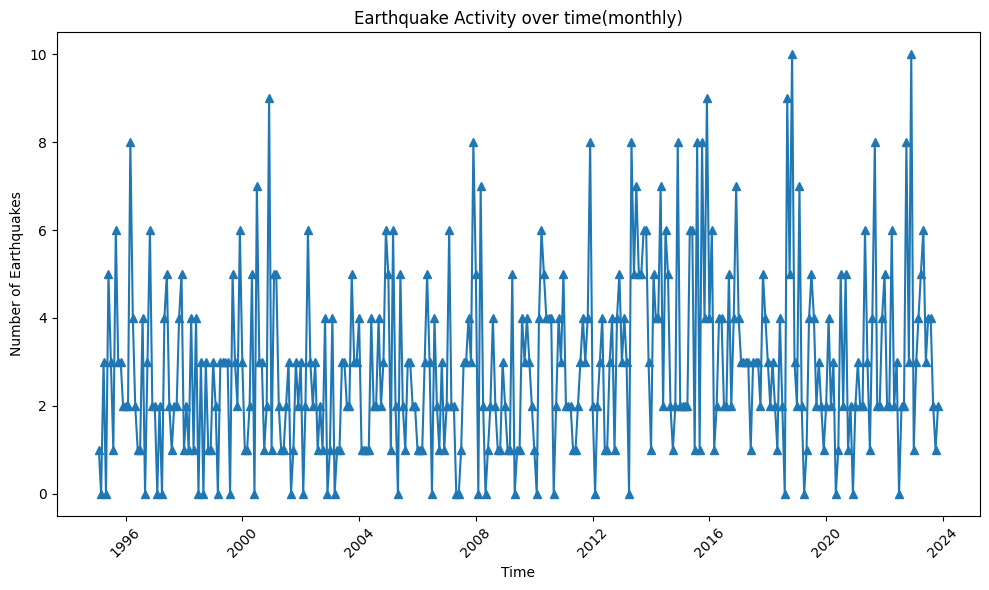

In [42]:
plt.figure(figsize=(10,6))
plt.plot(monthly_counts.index,monthly_counts.values,marker='^')
plt.xlabel('Time')
plt.ylabel('Number of Earthquakes')
plt.title('Earthquake Activity over time(monthly)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [102]:
year_counts=data.resample('Y',on='date_time').size()
year_counts

date_time
1995-12-31    29
1996-12-31    35
1997-12-31    28
1998-12-31    23
1999-12-31    33
2000-12-31    35
2001-12-31    28
2002-12-31    25
2003-12-31    31
2004-12-31    32
2005-12-31    28
2006-12-31    26
              ..
2012-12-31    31
2013-12-31    53
2014-12-31    48
2015-12-31    53
2016-12-31    43
2017-12-31    36
2018-12-31    43
2019-12-31    33
2020-12-31    27
2021-12-31    42
2022-12-31    41
2023-12-31    34
Freq: A-DEC, Length: 29, dtype: int64

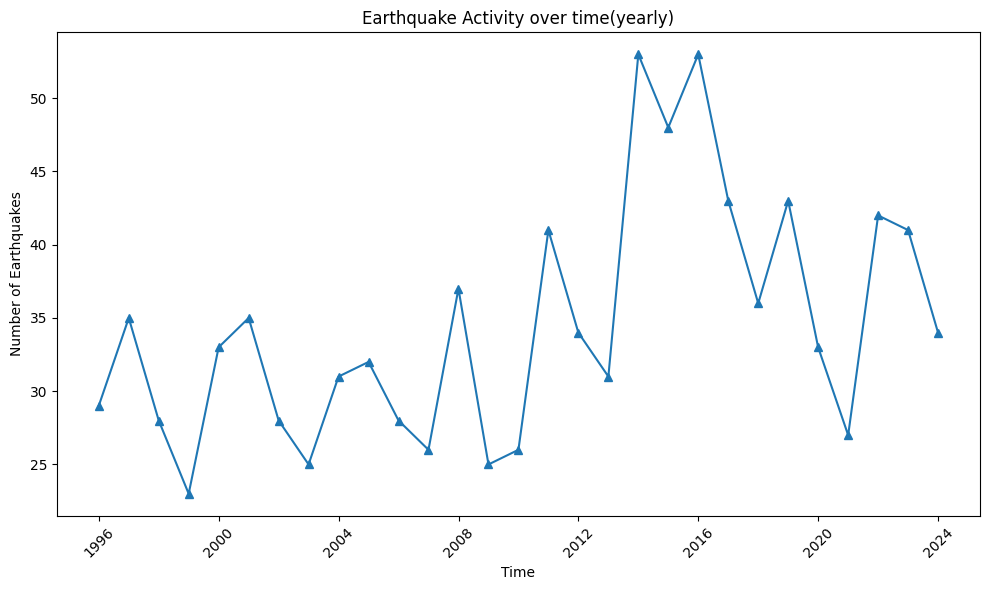

In [103]:
plt.figure(figsize=(10,6))
plt.plot(year_counts.index,year_counts.values,marker='^')
plt.xlabel('Time')
plt.ylabel('Number of Earthquakes')
plt.title('Earthquake Activity over time(yearly)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

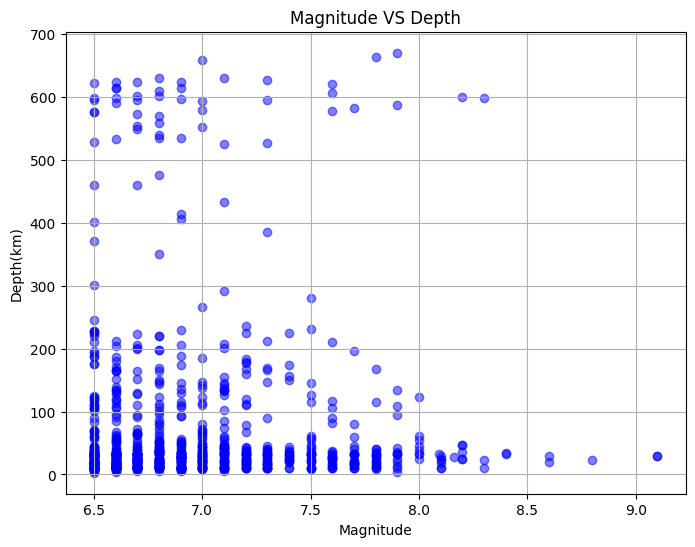

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(data['magnitude'],data['depth'],alpha=0.5,c='blue')
plt.xlabel('Magnitude')
plt.ylabel('Depth(km)')
plt.title('Magnitude VS Depth')
plt.grid(True)
plt.show()

In [44]:
correlation_matrix=data[['magnitude','depth','cdi','mmi','dmin']].corr()
correlation_matrix

,magnitude,depth,cdi,mmi,dmin
magnitude,1.000000,0.017083,0.163170,0.282275,-0.081518
depth,0.017083,1.000000,-0.051331,-0.517002,0.192698
cdi,0.163170,-0.051331,1.000000,0.197458,0.140505
mmi,0.282275,-0.517002,0.197458,1.000000,-0.307331
dmin,-0.081518,0.192698,0.140505,-0.307331,1.000000


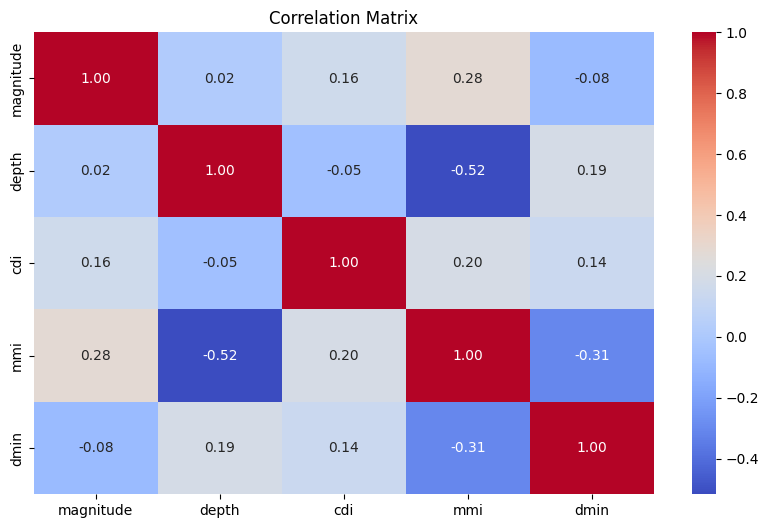

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

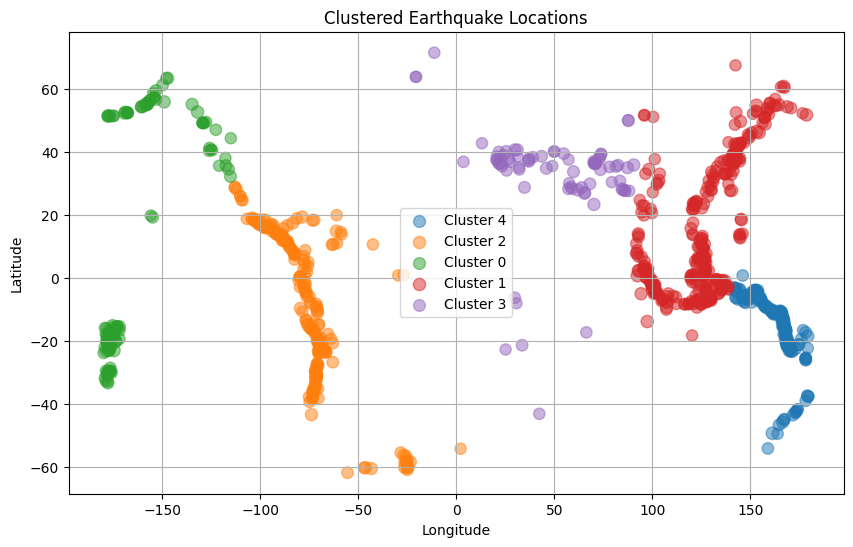

In [47]:
from sklearn.cluster import KMeans

# Clustering earthquakes based on Latitude and Longitude
coordinates = data[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=5)
data['Cluster'] = kmeans.fit_predict(coordinates)

plt.figure(figsize=(10, 6))
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], s=cluster_data['magnitude']*10, alpha=0.5, label=f'Cluster {cluster}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustered Earthquake Locations')
plt.legend()
plt.grid(True)
plt.show()


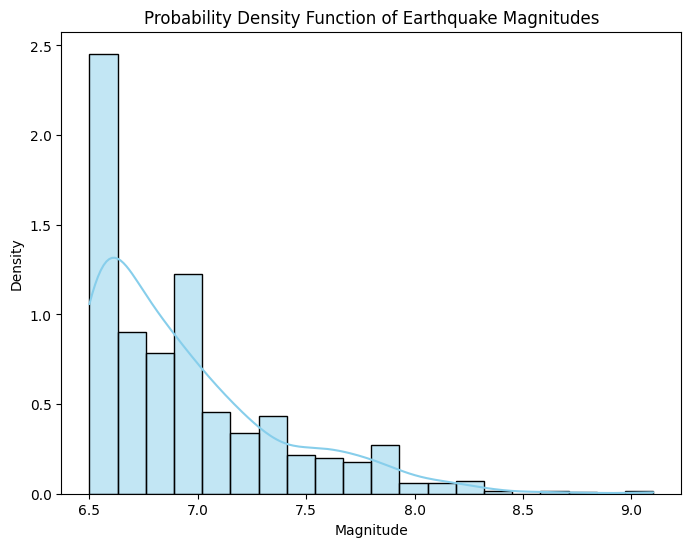

In [49]:
plt.figure(figsize=(8,6))
sns.histplot(data['magnitude'],kde=True,stat='density',bins=20,color='skyblue')
plt.xlabel('Magnitude')
plt.ylabel('Density')
plt.title('Probability Density Function of Earthquake Magnitudes')
plt.show()

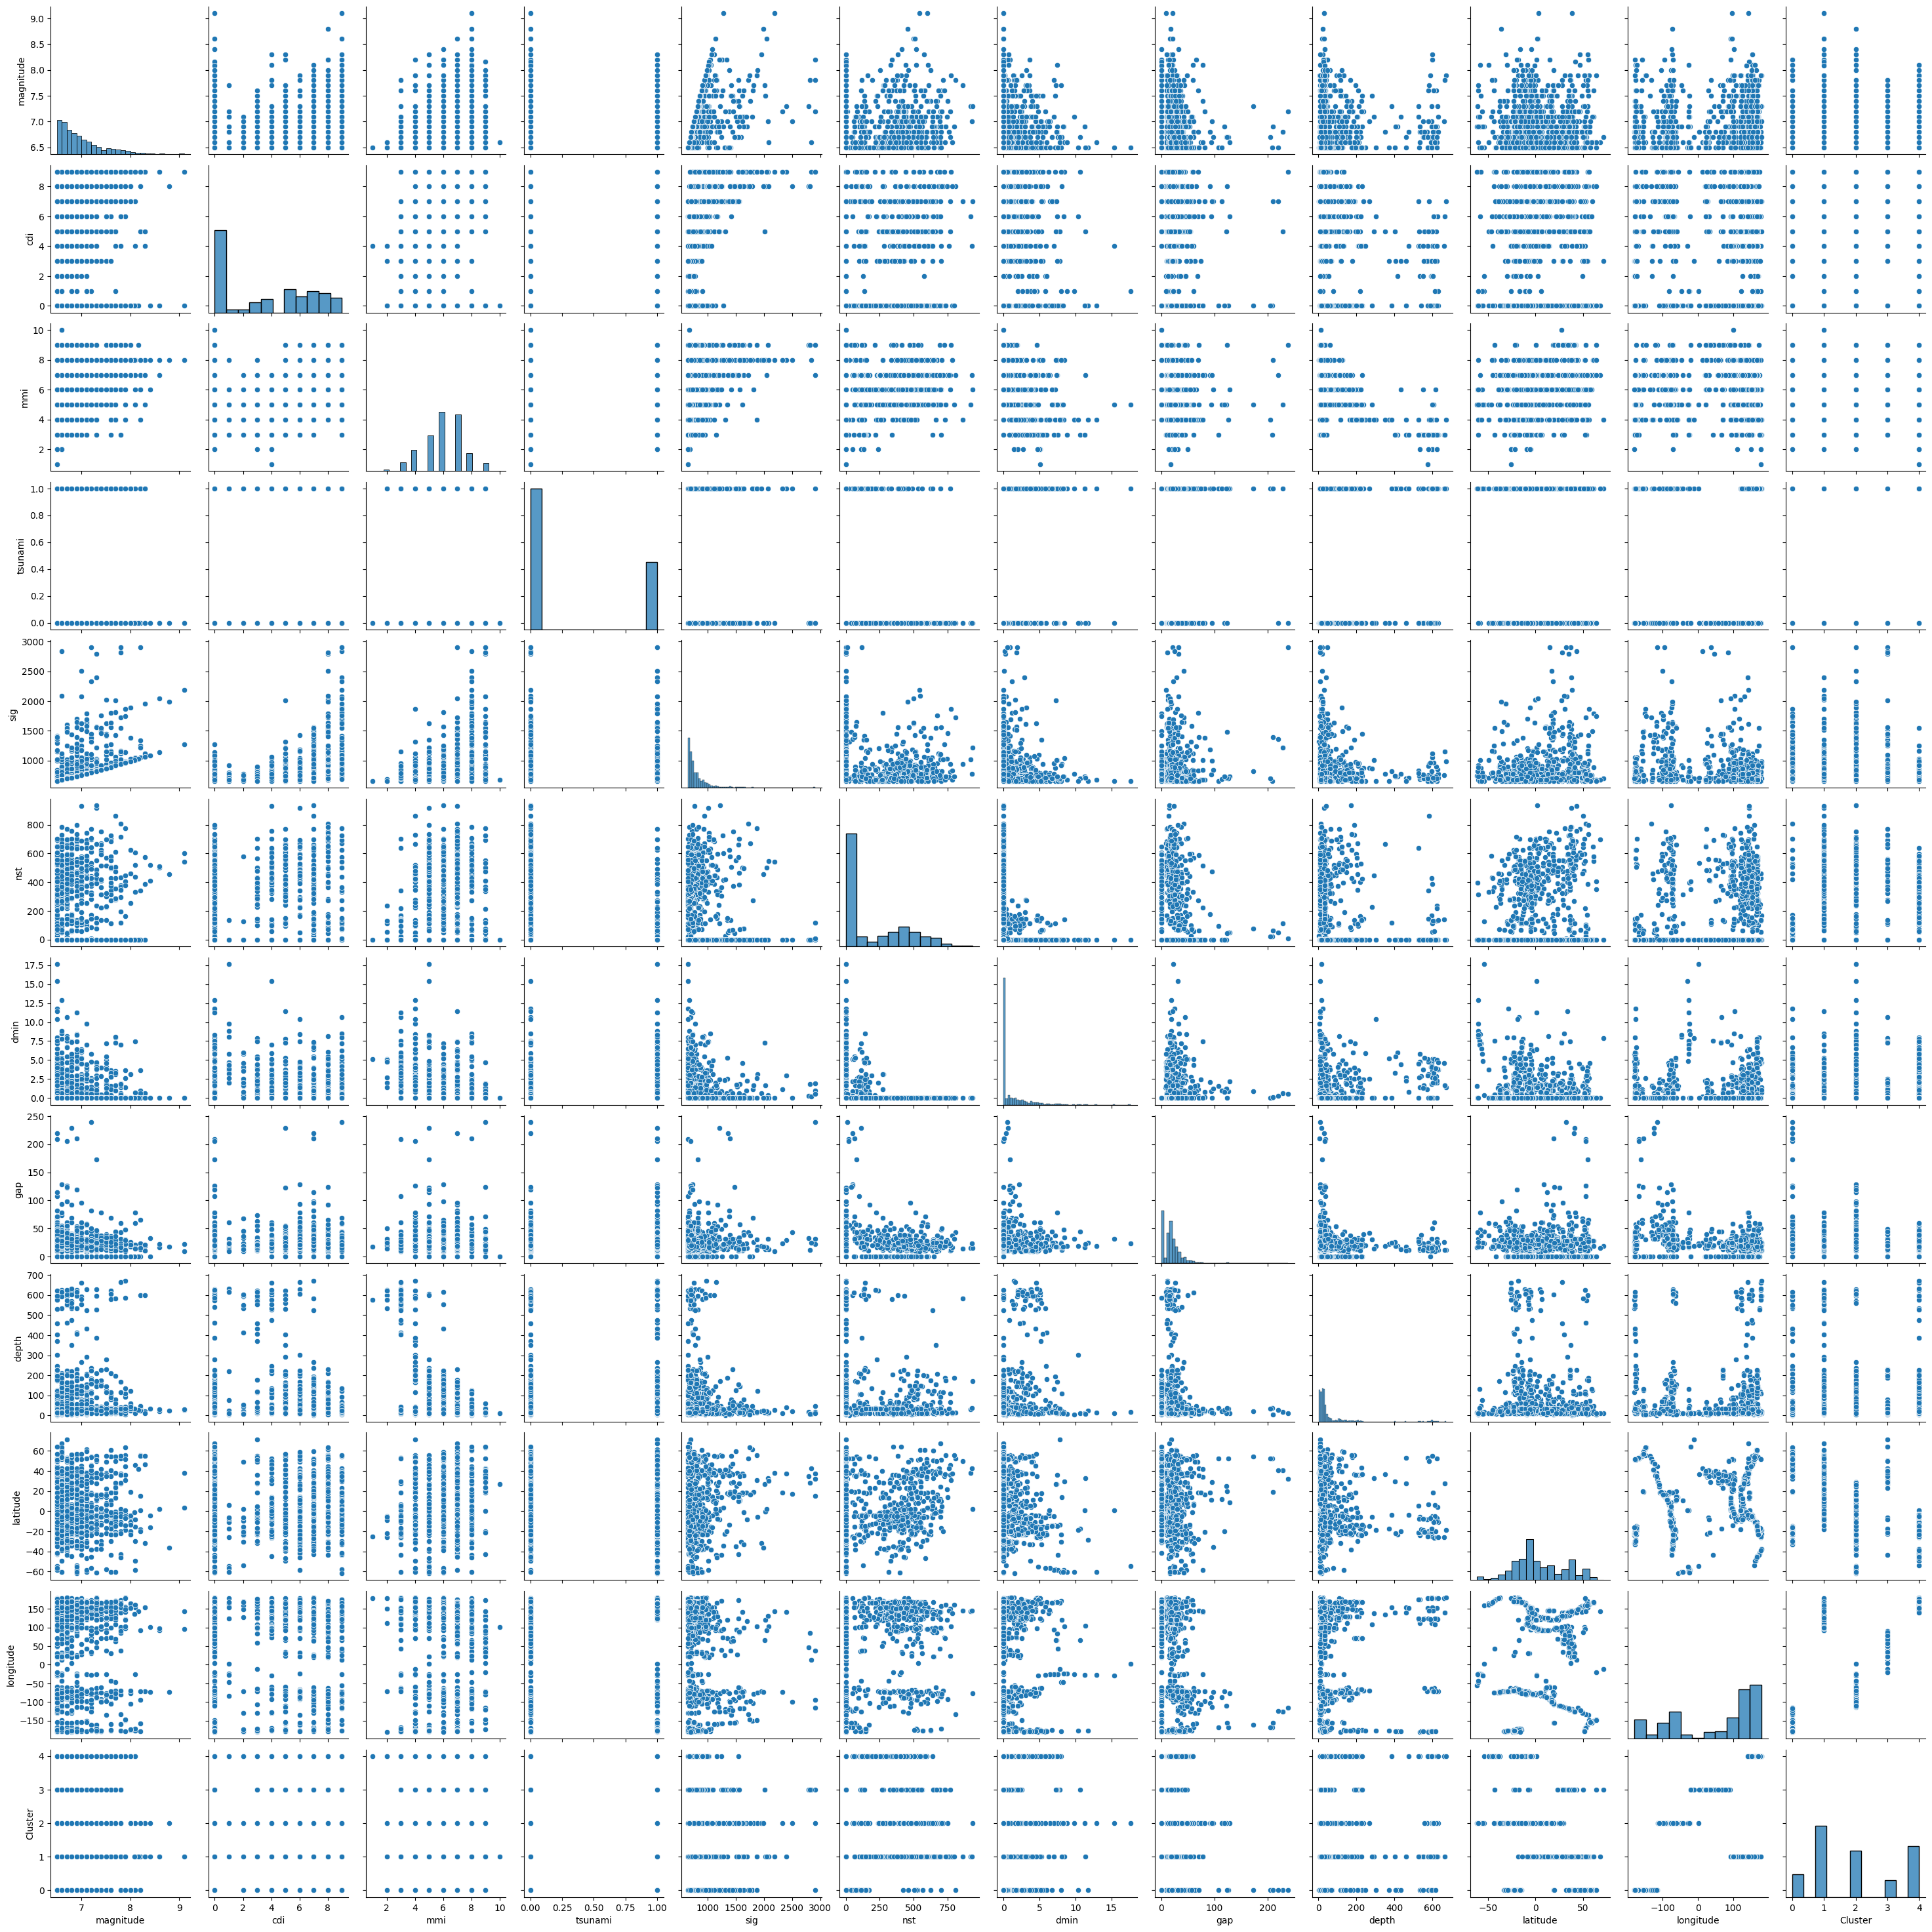

In [51]:
sns.pairplot(data)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [83]:
# Selecting features and target
target=['latitude','longitude','depth']
x=data[target]
print(x)

                     latitude  longitude    depth
date_time                                        
2023-08-16 12:47:00  -13.8814   167.1580  192.955
2023-07-19 00:22:00   12.8140   -88.1265   69.727
2023-07-17 03:05:00  -38.1911   -70.3731  171.371
2023-07-16 06:48:00   54.3844  -160.6990   32.571
2023-07-16 06:48:00   54.4900  -160.7960   21.000
2023-10-07 20:28:00   20.0196   -61.0955   10.000
2023-02-07 10:27:00  -17.8530  -174.9370  229.000
2023-06-15 18:06:00  -22.9824  -177.2080  167.404
2023-05-25 03:05:00    8.8894   -77.1231   10.000
2023-05-20 01:51:00  -23.0622   170.4560   35.981
2023-05-19 02:57:00  -23.2286   170.6940   18.027
2023-10-05 16:02:00  -15.6002  -174.6080  210.097
...                       ...        ...      ...
1995-08-16 16:24:00   -5.4290   153.7730   18.700
1995-08-16 10:27:00   -5.7990   154.1780   30.100
1995-08-14 04:37:00   -4.8360   151.5150  127.900
1995-07-30 05:11:00  -23.3400   -70.2940   45.600
1995-11-07 21:46:00   21.9660    99.1960   12.500


In [82]:
features='magnitude'
y=data[features]
print(y)

date_time
2023-08-16 12:47:00    6.5
2023-07-19 00:22:00    6.5
2023-07-17 03:05:00    6.6
2023-07-16 06:48:00    7.2
2023-07-16 06:48:00    7.3
2023-10-07 20:28:00    6.6
2023-02-07 10:27:00    6.9
2023-06-15 18:06:00    7.2
2023-05-25 03:05:00    6.6
2023-05-20 01:51:00    7.1
2023-05-19 02:57:00    7.7
2023-10-05 16:02:00    7.6
                      ... 
1995-08-16 16:24:00    6.6
1995-08-16 10:27:00    7.7
1995-08-14 04:37:00    6.7
1995-07-30 05:11:00    8.0
1995-11-07 21:46:00    6.8
1995-06-29 12:24:00    6.6
1995-06-15 00:15:00    6.5
1995-05-27 13:03:00    7.1
1995-05-16 20:12:00    7.7
1995-05-14 11:33:00    6.9
1995-05-13 08:47:00    6.6
1995-05-05 03:53:00    7.1
Name: magnitude, Length: 1000, dtype: float64


In [84]:
# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [85]:
# Fit a Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [89]:
# Predictions on the test set
y_pred=model.predict(x_test)
y_pred

array([6.93462872, 6.93376093, 6.93733908, 6.93332281, 6.93544498,
       6.93599728, 6.9353721 , 6.93917857, 6.93464952, 6.93712441,
       6.93497836, 6.93368414, 6.95079828, 6.93434676, 6.93623414,
       6.93528275, 6.9406192 , 6.9449691 , 6.94026001, 6.93954966,
       6.9390298 , 6.93345   , 6.93745563, 6.93441997, 6.96636183,
       6.93633128, 6.93429385, 6.94462008, 6.93648557, 6.93352135,
       6.93422684, 6.94059952, 6.9322901 , 6.94189161, 6.93711028,
       6.96535253, 6.94401857, 6.93359054, 6.94675132, 6.93446709,
       6.93255185, 6.9387755 , 6.93389465, 6.93620774, 6.94345656,
       6.93225033, 6.94294076, 6.93426836, 6.93397477, 6.93335825,
       6.94194893, 6.93532783, 6.93388093, 6.93535748, 6.95154311,
       6.96893365, 6.9447845 , 6.93239491, 6.9367335 , 6.93794126,
       6.93516371, 6.93203733, 6.94039164, 6.9411639 , 6.93488948,
       6.93526304, 6.94384284, 6.93329165, 6.94319009, 6.9356868 ,
       6.93304633, 6.94093029, 6.93725529, 6.93330301, 6.93497

In [90]:
# Calculate and print RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.4419190767257086


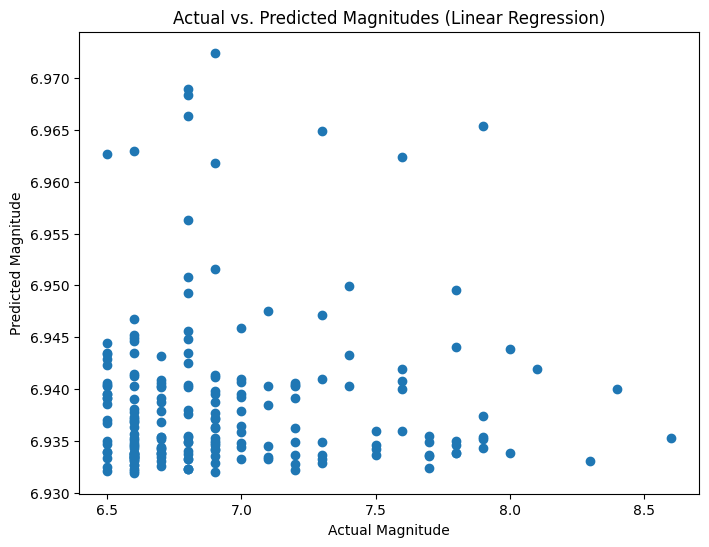

In [91]:
# Visualize actual vs. predicted magnitudes
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Actual vs. Predicted Magnitudes (Linear Regression)')
plt.show()

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [94]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [96]:
# Train the model
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [97]:
# Make predictions on the test set
y_pred= rf_model.predict(x_test)
y_pred

array([6.82  , 6.64  , 6.879 , 7.186 , 6.962 , 6.785 , 7.318 , 7.161 ,
       6.859 , 7.165 , 6.853 , 6.785 , 6.893 , 6.876 , 6.781 , 6.902 ,
       7.227 , 6.865 , 7.006 , 6.959 , 6.81  , 7.172 , 6.758 , 6.945 ,
       6.799 , 6.77  , 6.734 , 7.079 , 7.058 , 6.993 , 6.714 , 6.86  ,
       7.354 , 6.733 , 6.798 , 7.323 , 6.877 , 6.69  , 7.234 , 7.133 ,
       6.796 , 6.588 , 6.85  , 6.8   , 6.998 , 6.977 , 6.995 , 7.129 ,
       7.2084, 6.8   , 6.717 , 6.902 , 6.902 , 6.81  , 6.942 , 6.985 ,
       7.07  , 7.049 , 6.867 , 6.823 , 7.0904, 7.562 , 6.953 , 6.813 ,
       6.658 , 7.053 , 7.362 , 7.22  , 6.79  , 7.104 , 7.246 , 6.795 ,
       6.953 , 6.85  , 7.105 , 6.936 , 6.902 , 6.81  , 6.796 , 6.726 ,
       6.888 , 6.883 , 6.977 , 6.621 , 6.877 , 6.834 , 6.712 , 6.841 ,
       7.386 , 6.86  , 6.789 , 6.944 , 6.733 , 7.298 , 6.759 , 6.902 ,
       6.74  , 6.698 , 6.773 , 6.607 , 6.934 , 6.665 , 6.8966, 7.146 ,
       7.085 , 6.671 , 6.788 , 6.75  , 7.557 , 6.824 , 7.063 , 6.776 ,
      

In [99]:
# Evaluate the model
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.21231106444999995


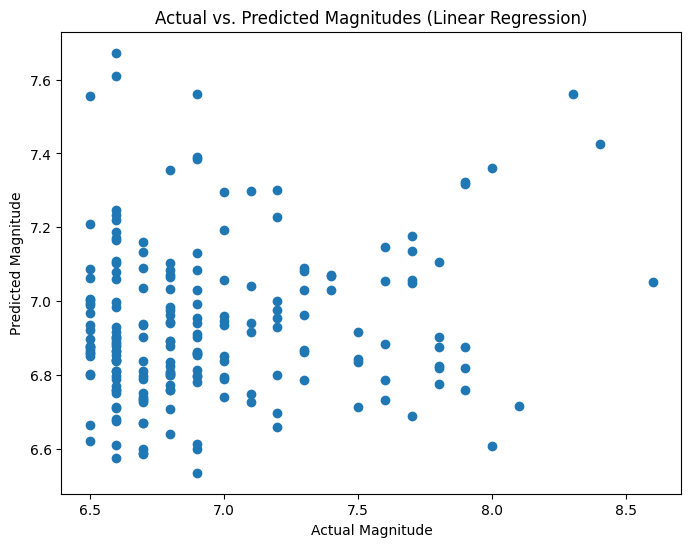

In [100]:
# Visualize actual vs. predicted magnitudes
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Actual vs. Predicted Magnitudes (Random Forest)')
plt.show()